# MSER(maximally stable external regions)
- Refer [paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/matas_2002.pdf)
- The goal of MSER is to create a “blob”-like detector, where the blob is defined by areas of an image that exhibit:
    - connected components
    - near uniform (i.e. almost identical) pixel intensities
    - contrasting background
- If all conditions hold, the region is marked as keypoint.
- Does not perform well in case of blurred images. 
- too slow for real-time performance but can exhibit good classification and retrieval performance if the above three scenarios hold.

## How it works
- Works by applying series of thresholds, one for each of the $[0,255]$ grayscale levels $T_l$
- For each of these levels, a thresholded image is defined by $I_t = I>T_l$ thus creating a series of black and white thresholded images.
- MSER is monitoring the changes to each of these thresholded images and is looking for regions of the thresholded images that maintain unchanged shapes over a large set of the possible threshold values.
- Detects regions in image that are connected. These regions also have similar color and surrounded by contrasting colors.
- Steps
    - For each thresholded images, perform a connected component analysis on binary regions.
    - Compute area $A(i)$ of each of these connected components.
    - Monitor area $A(i)$ of these connected components over multiple thresholded values. If the area remains relatively constant in size, then mark the region as a keypoint
<img src="../../images/embedded_images/mser_thresh.jpg" alt="MSER Thresh" style="width: 600px;"/>
- MSER takes each of these regions, computes connected component analysis and then monitor them as their size changes over multiple thresholds.
- When using MSER ensure regions of the image are:
    - Small
    - Relatively same pixel intensity
    - Surrounded by contrasting pixels.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import display_image, create_subplot

In [3]:
args = {
    "image":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg"
}

In [4]:
def keypoint_detect(imagePath):
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #detect MSER keypoints
    detector = cv2.MSER_create()
    kps = detector.detect(gray, None)
    
    print("# of keypoints: {}".format(len(kps)))
    
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
    
    display_image("Images", np.hstack([orig, image]))

# of keypoints: 665


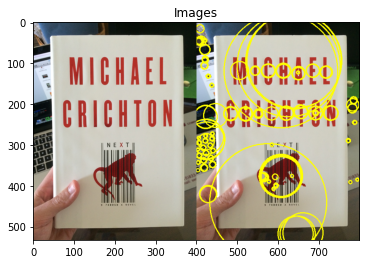

In [5]:
keypoint_detect(args["image"])

# of keypoints: 106


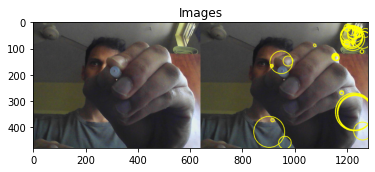

In [6]:
keypoint_detect(args["pen"])